In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from shapely.geometry import LineString as ls
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import scipy.constants as con
import csv

In [2]:
mR = pd.read_csv("Data/Freiheitsgrade/Raumtemperatur(23,3).dat",sep='\t',decimal=".", skiprows=9)
mR2 = pd.read_csv("Data/Freiheitsgrade/Raumtemperatur2.dat",sep='\t',decimal=".", skiprows=9)
mH = pd.read_csv("Data/Freiheitsgrade/hintergrund.dat",sep='\t',decimal=".", skiprows=9)

m1 = pd.read_csv("Data/Freiheitsgrade/62 pm 2.dat",sep='\t',decimal=".", skiprows=9)
m2 = pd.read_csv("Data/Freiheitsgrade/54,5 pm 2.dat",sep='\t',decimal=".", skiprows=9)
m3 = pd.read_csv("Data/Freiheitsgrade/50 pm 1 (300datasets now).dat",sep='\t',decimal=".", skiprows=9)
m4 = pd.read_csv("Data/Freiheitsgrade/46 pm 1.dat",sep='\t',decimal=".", skiprows=9)
m5 = pd.read_csv("Data/Freiheitsgrade/39,5 pm 2.dat",sep='\t',decimal=".", skiprows=9)
m6 = pd.read_csv("Data/Freiheitsgrade/35 pm 1.dat",sep='\t',decimal=".", skiprows=9)
m7 = pd.read_csv("Data/Freiheitsgrade/31 pm 1.dat",sep='\t',decimal=".", skiprows=9)
m8 = pd.read_csv("Data/Freiheitsgrade/22 pm 1.dat",sep='\t',decimal=".", skiprows=9)
m9 = pd.read_csv("Data/Freiheitsgrade/17,5 pm 1.dat",sep='\t',decimal=".", skiprows=9)
m10 = pd.read_csv("Data/Freiheitsgrade/09,8 pm 1.dat",sep='\t',decimal=".", skiprows=9)
m11 = pd.read_csv("Data/Freiheitsgrade/04,5 pm 1.dat",sep='\t',decimal=".", skiprows=9)

# T = [62,54.5,50,46,39.5,35,31,23.3,22,17.5,9.8,4.5]
# uT = [2,2,1,1,2,1,1,1,1,1,1,1]
# m = [m1,m2,m3,m4,m5,m6,m7,mR,m8,m9,m10,m11]

# ohne mR
T = [62,54.5,50,46,39.5,35,31,22,17.5,9.8,4.5]
uT = [2,2,1,1,2,1,1,1,1,1,1]
m = [m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11]

uf = [1.5]*len(T)

mR.columns
print(uf)
m1


[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]


,f in Hz,A in dBV
0,0.000000,-14.543656
1,1.464844,-13.791110
2,2.929687,-13.143687
3,4.394531,-12.578441
4,5.859375,-12.112804
...,...,...
677,991.699219,-15.048177
678,993.164062,-15.080388
679,994.628906,-15.160671
680,996.093750,-15.212479


In [3]:
Ncolors = 11
#colormap = plt.cm.Dark2# ListedColormap
colormap = plt.cm.jet# LinearSegmentedColormap
Ncolors = min(colormap.N,Ncolors)
mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]

# übersicht

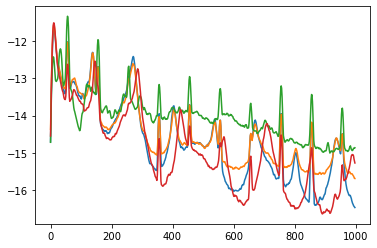

In [4]:
plt.plot(mR['f in Hz'],mR['A in dBV'])
plt.plot(mR2['f in Hz'],mR2['A in dBV'])
plt.plot(mH['f in Hz'],mH['A in dBV'])
# plt.plot(mR2['f in Hz'],mR2['A in dBV']-mH['A in dBV'])
# # plt.plot(mR['f in Hz'],mR['A in dBV']-mH['A in dBV'])

plt.plot(m[0]['f in Hz'],m[0]['A in dBV'])

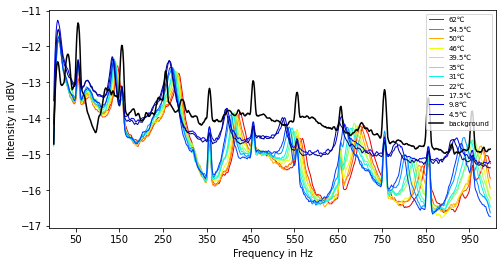

In [5]:
plt.figure(figsize=(8,4)) 


# korr = mH['A in dBV']
korr = 0

for i in range(len(m)):
    plt.plot(m[i]['f in Hz'],m[i]['A in dBV']-korr,label=str(T[i]) + "℃",linewidth=1,c=mapcolors[10-i])


plt.plot(mH['f in Hz'],mH['A in dBV'],color ="k",label="background",linewidth=1.5)

axes = plt.gca()
axes.set_xlim(-10,1010)
# axes.set_ylim(-14.5,-12)
# axes.set_ylim(-2,1)

plt.xlabel("Frequency in Hz")
plt.ylabel("Intensity in dBV")
plt.legend(fontsize="x-small")

plt.xticks(np.arange(50,1000, step=100)) 

# plt.legend(loc="upper left")
plt.savefig('Bilder/fg/global-data.png',dpi=300)
plt.savefig('Bilder/fg/global-data.pgf')

(-16.0, -13.0)

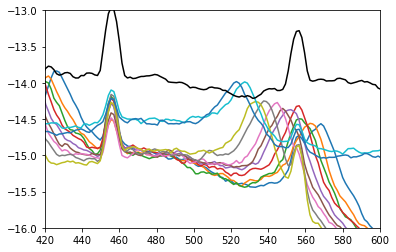

In [6]:
for i in range(len(m)):
    plt.plot(m[i]['f in Hz'],m[i]['A in dBV'],label=str(T[i]) + "℃")

plt.plot(mH['f in Hz'],mH['A in dBV'],color ="k",label="hintergrund")

axes = plt.gca()
axes.set_xlim(420,600)
axes.set_ylim(-16,-13)
# axes.set_ylim(-2,1)



# peaks suchen

[99    145.019531
Name: f in Hz, dtype: float64, 98    143.554687
Name: f in Hz, dtype: float64, 98    143.554687
Name: f in Hz, dtype: float64, 97    142.089844
Name: f in Hz, dtype: float64, 96    140.625
Name: f in Hz, dtype: float64, 95    139.160156
Name: f in Hz, dtype: float64, 95    139.160156
Name: f in Hz, dtype: float64, 94    137.695312
Name: f in Hz, dtype: float64, 94    137.695312
Name: f in Hz, dtype: float64, 92    134.765625
Name: f in Hz, dtype: float64, 91    133.300781
Name: f in Hz, dtype: float64]


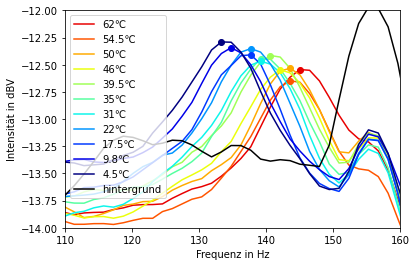

In [7]:
# korr = mH['A in dBV']
korr = 0

for i in range(len(m)):
    plt.plot(m[i]['f in Hz'],m[i]['A in dBV']-korr,label=str(T[i]) + "℃",c=mapcolors[10-i], zorder = 0)

plt.plot(mH['f in Hz'],mH['A in dBV'],color ="k",label="hintergrund")

axes = plt.gca()
axes.set_xlim(110,160)
axes.set_ylim(-14,-12)
# axes.set_ylim(-2,1)

plt.xlabel("Frequenz in Hz")
plt.ylabel("Intensität in dBV")


plt.legend(loc="upper left")


peak=[0]*len(m)
for i in range(len(m)):
    x=m[i]['f in Hz'][70:105]
    y=m[i]['A in dBV'][70:105]    
    peaks = find_peaks(y,-13) 
    height = peaks[1]['peak_heights']
    peak_pos = x[peaks[0]+70]
    plt.scatter(peak_pos , height,color=mapcolors[10-i], zorder = 1)
    # print(peak_pos,str(T[i]) + "℃")
    peak[i]=peak_pos

print(peak)
c1 = np.multiply(peak,2)
f1=peak
uc1 = np.multiply(uf,2)
# datapoint 1

plt.savefig('Bilder/fg/data1.png',dpi=300)

[195    285.644531
Name: f in Hz, dtype: float64, 194    284.179687
Name: f in Hz, dtype: float64, 192    281.25
Name: f in Hz, dtype: float64, 191    279.785156
Name: f in Hz, dtype: float64, 191    279.785156
Name: f in Hz, dtype: float64, 188    275.390625
Name: f in Hz, dtype: float64, 187    273.925781
Name: f in Hz, dtype: float64, 186    272.460937
Name: f in Hz, dtype: float64, 184    269.53125
Name: f in Hz, dtype: float64, 180    263.671875
Name: f in Hz, dtype: float64, 180    263.671875
Name: f in Hz, dtype: float64]


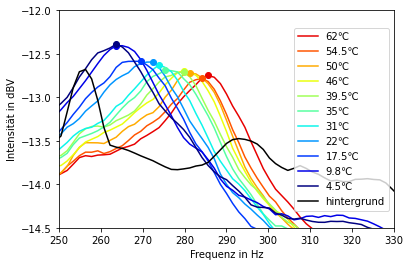

In [8]:
# korr = mH['A in dBV']
korr = 0

for i in range(len(m)):
    plt.plot(m[i]['f in Hz'],m[i]['A in dBV']-korr,label=str(T[i]) + "℃",c=mapcolors[10-i], zorder = 0)

plt.plot(mH['f in Hz'],mH['A in dBV'],color ="k",label="hintergrund")

axes = plt.gca()
axes.set_xlim(250,330)
axes.set_ylim(-14.5,-12)
# axes.set_ylim(-2,1)

plt.xlabel("Frequenz in Hz")
plt.ylabel("Intensität in dBV")


plt.legend(loc="right")

peak=[0]*len(m)
for i in range(len(m)):
    x=m[i]['f in Hz'][120:]
    y=m[i]['A in dBV'][120:]    
    peaks = find_peaks(y,-13) 
    height = peaks[1]['peak_heights']
    peak_pos = x[peaks[0]+120]
    plt.scatter(peak_pos , height,color=mapcolors[10-i], zorder = 1)
    # print(peak_pos,str(T[i]) + "℃")
    peak[i]=peak_pos

print(peak)
c2 = peak
f2=peak
uc2 = uf

# datapoint 2
plt.savefig('Bilder/fg/data2.png',dpi=300)

[291    426.269531
Name: f in Hz, dtype: float64, 288    421.875
Name: f in Hz, dtype: float64, 285    417.480469
Name: f in Hz, dtype: float64, 285    417.480469
Name: f in Hz, dtype: float64, 282    413.085937
Name: f in Hz, dtype: float64, 281    411.621094
Name: f in Hz, dtype: float64, 279    408.691406
Name: f in Hz, dtype: float64, 276    404.296875
Name: f in Hz, dtype: float64, 273    399.902344
Name: f in Hz, dtype: float64, 270    395.507812
Name: f in Hz, dtype: float64, 268    392.578125
Name: f in Hz, dtype: float64]


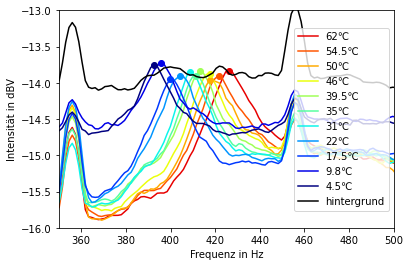

In [9]:
# korr = mH['A in dBV']
korr = 0

for i in range(len(m)):
    plt.plot(m[i]['f in Hz'],m[i]['A in dBV']-korr,label=str(T[i]) + "℃",color=mapcolors[10-i], zorder = 0)

plt.plot(mH['f in Hz'],mH['A in dBV'],color ="k",label="hintergrund")

axes = plt.gca()
axes.set_xlim(350,500)
axes.set_ylim(-16,-13)
# axes.set_ylim(-2,1)

plt.xlabel("Frequenz in Hz")
plt.ylabel("Intensität in dBV")


plt.legend(loc="right")

peak=[0]*len(m)
for i in range(len(m)):
    x=m[i]['f in Hz'][250:300]
    y=m[i]['A in dBV'][250:300]    
    peaks = find_peaks(y,-14.2) 
    height = peaks[1]['peak_heights']
    peak_pos = x[peaks[0]+250]
    plt.scatter(peak_pos , height,color=mapcolors[10-i], zorder = 1)
    # print(peak_pos,str(T[i]) + "℃")
    peak[i]=peak_pos

print(peak)
c3 = np.multiply(peak,2/3)
f3=peak
uc3 = np.multiply(uf,2/3)

# datapoint 3
plt.savefig('Bilder/fg/data3.png',dpi=300)

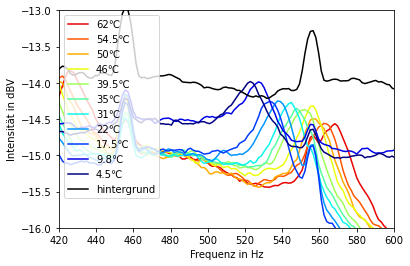

In [10]:
# korr = mH['A in dBV']
korr = 0

for i in range(len(m)):
    plt.plot(m[i]['f in Hz'],m[i]['A in dBV']-korr,label=str(T[i]) + "℃",color=mapcolors[10-i], zorder = 0)


plt.plot(mH['f in Hz'],mH['A in dBV'],color ="k",label="hintergrund")

axes = plt.gca()
axes.set_xlim(420,600)
axes.set_ylim(-16,-13)

plt.xlabel("Frequenz in Hz")
plt.ylabel("Intensität in dBV")


plt.legend(loc="upper left")
plt.savefig('Bilder/fg/data4.png',dpi=300)

11


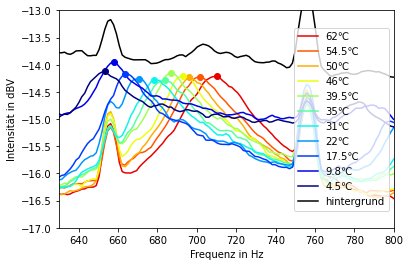

In [11]:
# korr = mH['A in dBV']
korr = 0

for i in range(len(m)):
    plt.plot(m[i]['f in Hz'],m[i]['A in dBV']-korr,label=str(T[i]) + "℃",color=mapcolors[10-i], zorder = 0)


plt.plot(mH['f in Hz'],mH['A in dBV']+0.5,color ="k",label="hintergrund")

axes = plt.gca()
axes.set_xlim(630,800)
axes.set_ylim(-17,-13)

plt.xlabel("Frequenz in Hz")
plt.ylabel("Intensität in dBV")


plt.legend(loc="right")

peak=[0]*len(m)
for i in range(len(m)):
    x=m[i]['f in Hz'][400:500]
    y=m[i]['A in dBV'][400:500]    
    peaks = find_peaks(y,-14.4) 
    height = peaks[1]['peak_heights']
    peak_pos = x[peaks[0]+400]
    plt.scatter(peak_pos , height,color=mapcolors[10-i], zorder = 1)
    # print(peak_pos,str(T[i]) + "℃")
    peak[i]=peak_pos

print(len(peak))
c5 =np.multiply(peak,2/5)
f5=peak
uc5 = np.multiply(uf,2/5)

# datapoint 4
plt.savefig('Bilder/fg/data5.png',dpi=300)

[Series([], Name: f in Hz, dtype: float64), 575    842.285156
Name: f in Hz, dtype: float64, 570    834.960937
Name: f in Hz, dtype: float64, 568    832.03125
Name: f in Hz, dtype: float64, 562    823.242187
Name: f in Hz, dtype: float64, 560    820.3125
Name: f in Hz, dtype: float64, 556    814.453125
Name: f in Hz, dtype: float64, 549    804.199219
Name: f in Hz, dtype: float64, 545    798.339844
Name: f in Hz, dtype: float64, 539    789.550781
Name: f in Hz, dtype: float64, 534    782.226562
Name: f in Hz, dtype: float64]


/tmp/ipykernel_335/1481248351.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c6 = np.multiply(peak,2/6)


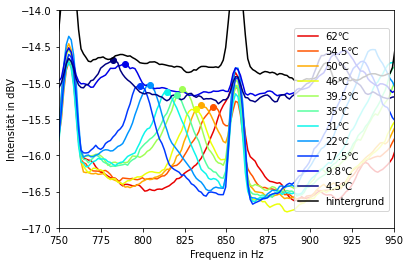

In [12]:
# korr = mH['A in dBV']
korr = 0

for i in range(len(m)):
    plt.plot(m[i]['f in Hz'],m[i]['A in dBV']-korr,label=str(T[i]) + "℃",color=mapcolors[10-i], zorder = 0)

plt.plot(mH['f in Hz'],mH['A in dBV'],color ="k",label="hintergrund")

axes = plt.gca()
axes.set_xlim(750,950)
axes.set_ylim(-17,-14)

plt.xlabel("Frequenz in Hz")
plt.ylabel("Intensität in dBV")


plt.legend(loc="right")

peak=[0]*len(m)
for i in range(len(m)):
    x=m[i]['f in Hz'][525:580]
    y=m[i]['A in dBV'][525:580]
    peaks = find_peaks(y,-15.5,prominence=0.2) 
    height = peaks[1]['peak_heights']
    peak_pos = x[peaks[0]+525]
    plt.scatter(peak_pos , height,color=mapcolors[10-i], zorder = 1)
    # print(peak_pos,str(T[i]) + "℃")
    peak[i]=peak_pos

print(peak)
c6 = np.multiply(peak,2/6)
f6=peak

# datapoint 5
# deleted

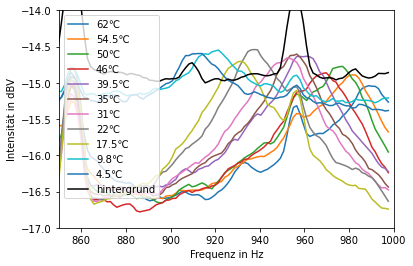

In [13]:
# korr = mH['A in dBV']
korr = 0

for i in range(len(m)):
    plt.plot(m[i]['f in Hz'],m[i]['A in dBV']-korr,label=str(T[i]) + "℃")

plt.plot(mH['f in Hz'],mH['A in dBV'],color ="k",label="hintergrund")

axes = plt.gca()
axes.set_xlim(850,1000)
axes.set_ylim(-17,-14)

plt.xlabel("Frequenz in Hz")
plt.ylabel("Intensität in dBV")


plt.legend(loc="upper left")

# Analyse

In [14]:
rows = [[]*5]*len(T)

for i in range(len(T)):
    xT = "\SI{" + str(T[i]) + " \pm " +  str(uT[i]) + r"}{\celsius}"
    x1 = "\SI{" + str(np.round(float(f1[i]),2)) + " \pm " +  str(uf[i]) + r"}{\hertz}"
    x2 = "\SI{" + str(np.round(float(f2[i]),2)) + " \pm " +  str(uf[i]) + r"}{\hertz}"
    x3 = "\SI{" + str(np.round(float(f3[i]),2)) + " \pm " +  str(uf[i]) + r"}{\hertz}"
    x5 = "\SI{" + str(np.round(float(f5[i]),2)) + " \pm " +  str(uf[i]) + r"}{\hertz}"
    rows[i] = [xT,x1,x2,x3,x5]
    print(x1)
    
fields= ["Temperature", "$f_1$", "$f_2$", "$f_3$", "$f_5$"]

filename = "Bilder/freq.csv"

with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

print(rows[1])

\SI{145.02 \pm 1.5}{\hertz}
\SI{143.55 \pm 1.5}{\hertz}
\SI{143.55 \pm 1.5}{\hertz}
\SI{142.09 \pm 1.5}{\hertz}
\SI{140.62 \pm 1.5}{\hertz}
\SI{139.16 \pm 1.5}{\hertz}
\SI{139.16 \pm 1.5}{\hertz}
\SI{137.7 \pm 1.5}{\hertz}
\SI{137.7 \pm 1.5}{\hertz}
\SI{134.77 \pm 1.5}{\hertz}
\SI{133.3 \pm 1.5}{\hertz}
['\\SI{54.5 \\pm 2}{\\celsius}', '\\SI{143.55 \\pm 1.5}{\\hertz}', '\\SI{284.18 \\pm 1.5}{\\hertz}', '\\SI{421.88 \\pm 1.5}{\\hertz}', '\\SI{701.66 \\pm 1.5}{\\hertz}']


In [15]:
rows = [[]*5]*len(T)

for i in range(len(T)):
    xT = "\SI{" + str(T[i]) + " \pm " +  str(uT[i]) + r"}{\celsius}"
    x1 = "\SI{" + str(np.round(float(c1[i]),2)) + " \pm " +  str(int(uc1[i])) + r"}{\m\per\s}"
    x2 = "\SI{" + str(np.round(float(c2[i]),2)) + " \pm " +  str(float(uc2[i])) + r"}{\m\per\s}"
    x3 = "\SI{" + str(np.round(float(c3[i]),2)) + " \pm " +  str(np.round(float(uc3[i]),2)) + r"}{\m\per\s}"
    x5 = "\SI{" + str(np.round(float(c5[i]),2)) + " \pm " +  str(np.round(float(uc5[i]),2)) + r"}{\m\per\s}"
    rows[i] = [xT,x1,x2,x3,x5]
    print(x1)
    
fields= ["Temperature", "$c_1$", "$c_2$", "$c_3$", "$c_5$"]

filename = "Bilder/speed.csv"

with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

print(rows[1])

\SI{290.04 \pm 3}{\m\per\s}
\SI{287.11 \pm 3}{\m\per\s}
\SI{287.11 \pm 3}{\m\per\s}
\SI{284.18 \pm 3}{\m\per\s}
\SI{281.25 \pm 3}{\m\per\s}
\SI{278.32 \pm 3}{\m\per\s}
\SI{278.32 \pm 3}{\m\per\s}
\SI{275.39 \pm 3}{\m\per\s}
\SI{275.39 \pm 3}{\m\per\s}
\SI{269.53 \pm 3}{\m\per\s}
\SI{266.6 \pm 3}{\m\per\s}
['\\SI{54.5 \\pm 2}{\\celsius}', '\\SI{287.11 \\pm 3}{\\m\\per\\s}', '\\SI{284.18 \\pm 1.5}{\\m\\per\\s}', '\\SI{281.25 \\pm 1.0}{\\m\\per\\s}', '\\SI{280.66 \\pm 0.6}{\\m\\per\\s}']


[[290.039062]
 [287.109374]
 [287.109374]
 [284.179688]
 [281.25    ]
 [278.320312]
 [278.320312]
 [275.390624]
 [275.390624]
 [269.53125 ]
 [266.601562]]


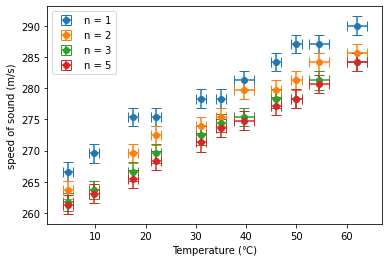

In [16]:
c = [c1,c2,c3,c5]
uc = [uc1,uc2,uc3,uc5]
# cs = []*4
n = [1,2,3,5]

for i in range(len(c)):
    # c[i] = np.reshape(c[i], (len(T)))
    plt.errorbar(T,np.reshape(c[i], (len(T))),xerr=uT, yerr=uf[i], fmt='o', capsize=5,label="n = " + str(n[i]))
    # print(len(T))
# plt.scatter(c6[1:],T[1:])
print(c[0])
plt.xlabel("Temperature (℃)")
plt.ylabel("speed of sound (m/s)")

plt.legend()

plt.savefig('Bilder/fg/speedofsound.png',dpi=300)

In [17]:
f = [f1,f2,f3,f5]
for x in f:
    x = np.reshape(x, (len(T),1))
n= [1,2,3,5]
a=0.004
r=(17/2)/1000
print(f[0])

[99    145.019531
Name: f in Hz, dtype: float64, 98    143.554687
Name: f in Hz, dtype: float64, 98    143.554687
Name: f in Hz, dtype: float64, 97    142.089844
Name: f in Hz, dtype: float64, 96    140.625
Name: f in Hz, dtype: float64, 95    139.160156
Name: f in Hz, dtype: float64, 95    139.160156
Name: f in Hz, dtype: float64, 94    137.695312
Name: f in Hz, dtype: float64, 94    137.695312
Name: f in Hz, dtype: float64, 92    134.765625
Name: f in Hz, dtype: float64, 91    133.300781
Name: f in Hz, dtype: float64]


[array([2.96697741, 2.96680961, 2.96680961, 2.96663923, 2.9664662 ,
       2.96629045, 2.96629045, 2.9661119 , 2.9661119 , 2.96574612,
       2.96555873]), array([1.48823016, 1.48819989, 1.48813866, 1.48810768, 1.48810768,
       1.48801328, 1.4879813 , 1.48794907, 1.48788383, 1.48775009,
       1.48775009]), array([0.99357559, 0.99354224, 0.99350837, 0.99350837, 0.99347397,
       0.99346237, 0.993439  , 0.99340347, 0.99336736, 0.99333065,
       0.99330583]), array([0.59701363, 0.596995  , 0.59698238, 0.59697601, 0.59696315,
       0.59695666, 0.59694355, 0.59692692, 0.59691002, 0.5968963 ,
       0.59688588])]


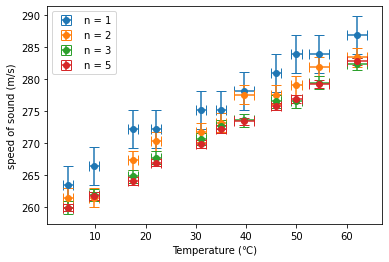

In [18]:
ce = [0]*4
uce = [0]*4

for i in range(4):
    fr = np.reshape(f[i], (len(T)))
    ce[i] = np.multiply(c[i],np.add(1,np.divide(-a/(2*r),np.sqrt(np.multiply(con.pi, f[i])))))
    cer = np.reshape(ce[i], (len(T)))
    cr =np.reshape(c[i], (len(T)))
    u1= np.divide(np.multiply(cer,uc[i]),cr)
    u2= np.divide(np.multiply(con.pi*a*r*cr,uf[i]),np.multiply(np.power(np.add(2*r*np.sqrt(con.pi*fr),-a),2),np.sqrt(con.pi*fr)))
    uce[i] = np.sqrt(np.add(np.power(u1,2),np.power(u2,2)))
    # uce[i]= np.multiply(a*r*np.sqrt(con.pi)np.divide(np.multiply(np.reshape(ce[i],len(T)),np.reshape(f[i], (len(T)))),np.multiply(np.power(),np.sqrt()))

    # print(np.reshape(ce[i], (len(T))))
# print(f,c)
for i in range(4):
    plt.errorbar(T,np.reshape(ce[i], (len(T))), xerr = uT, yerr=uce[i], fmt='o', capsize=5,label="n = " + str(n[i]))
temp = np.sqrt(np.multiply(con.pi, f6[1:]))
temp2 = np.divide(-a/(2*r),temp)
temp3 = np.add(1,temp2)
# cn6 = np.multiply(c6,np.average(temp3))

# plt.scatter(cn6,T[1:])

csum = np.divide(np.add(np.add(ce[0],ce[1]),np.add(ce[2],ce[3])),4)
ucs =  np.divide(np.sqrt(np.add(np.add(np.power(uce[0],2),np.power(uce[1],2)),np.add(np.power(uce[2],2),np.power(uce[3],2)))),4)
M = 44.01/1000

cs = [0]*len(m)
for i in range(len(m)):
    cs[i]=csum[i][0]
Tk = np.add(T, 273.15)
    
k = np.multiply(np.power(cs,2),np.divide(M/con.R,Tk))
uk = np.sqrt(np.add(np.power(np.multiply(np.multiply(cs,np.divide(2*M/con.R,Tk)),ucs),2),np.power(np.multiply(np.multiply(np.power(cs,2),np.divide(M/con.R,np.power(Tk,2))),uT),2)))
# uk = np.multiply(np.multiply(cs,np.divide(M/con.R,Tk)),ucs)
# uk = np.multiply(np.multiply(np.power(cs,2),np.divide(M/con.R,np.power(Tk,2))),uT)

# print(len(np.divide(M/con.R,T)))
# print(np.power(csum,2))

kl = [1.310,1.304,1.26]
Tl = [0,15,100]
kl = [1.37,1.310,1.304,1.281,1.235]
Tl = [-75,0,15,100,400]
# Lange's Handbook of Chemistry, 10th ed, pp. 1525–1528
fg = np.divide(2,np.add(k,-1))
ufg = np.multiply(uk,np.divide(2,np.power(np.add(k,-1),2)))
print(uce)

fgl = np.divide(2,np.add(kl,-1))

plt.xlabel("Temperature (℃)")
plt.ylabel("speed of sound (m/s)")
plt.legend()

plt.savefig('Bilder/fg/speedofsound-korr.png',dpi=300)

In [19]:
rows = [[]*5]*len(T)

for i in range(len(T)):
    xT = "\SI{" + str(T[i]) + " \pm " +  str(uT[i]) + r"}{\celsius}"
    x1 = "\SI{" + str(np.round(float(ce[0][i]),2)) + " \pm " +  str(np.round(uce[0][i],2)) + r"}{\m\per\s}"
    x2 = "\SI{" + str(np.round(float(ce[1][i]),2)) + " \pm " +  str(np.round(uce[1][i],2)) + r"}{\m\per\s}"
    x3 = "\SI{" + str(np.round(float(ce[2][i]),2)) + " \pm " +  str(np.round(uce[2][i],2)) + r"}{\m\per\s}"
    x5 = "\SI{" + str(np.round(float(ce[3][i]),2)) + " \pm " +  str(np.round(uce[3][i],2)) + r"}{\m\per\s}"
    rows[i] = [xT,x1,x2,x3,x5]
    print(x1)
    
fields= ["Temperature", r"$c_{0,1}$", r"$c_{0,2}$", r"$c_{0,3}$", r"$c_{0,5}$"]

filename = "Bilder/speed-korr.csv"

with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)
    
print(rows[1])

\SI{286.84 \pm 2.97}{\m\per\s}
\SI{283.93 \pm 2.97}{\m\per\s}
\SI{283.93 \pm 2.97}{\m\per\s}
\SI{281.01 \pm 2.97}{\m\per\s}
\SI{278.1 \pm 2.97}{\m\per\s}
\SI{275.19 \pm 2.97}{\m\per\s}
\SI{275.19 \pm 2.97}{\m\per\s}
\SI{272.28 \pm 2.97}{\m\per\s}
\SI{272.28 \pm 2.97}{\m\per\s}
\SI{266.45 \pm 2.97}{\m\per\s}
\SI{263.54 \pm 2.97}{\m\per\s}
['\\SI{54.5 \\pm 2}{\\celsius}', '\\SI{283.93 \\pm 2.97}{\\m\\per\\s}', '\\SI{281.94 \\pm 1.49}{\\m\\per\\s}', '\\SI{279.43 \\pm 0.99}{\\m\\per\\s}', '\\SI{279.26 \\pm 0.6}{\\m\\per\\s}']


In [20]:
rows = [[]*5]*len(T)

for i in range(len(T)):
    xT = "\SI{" + str(T[i]) + " \pm " +  str(uT[i]) + r"}{\celsius}"
    xc = "\SI{" + str(np.round(float(cs[i]),2)) + " \pm " +  str(np.round(ucs[i],2)) + r"}{\m\per\s}"
    xk = "\SI{" + str(np.round(float(k[i]),4)) + " \pm " +  str(np.round(uk[i],4)) + r"}{}"
    xf = "\SI{" + str(np.round(float(fg[i]),2)) + " \pm " +  str(np.round(ufg[i],2)) + r"}{}"
    rows[i] = [xT,xc,xk,xf]
    print(xc)
    
fields= ["Temperature", "speed of sound", "adiabatenkonst.", "degrees of freedom"]

filename = "Bilder/constants.csv"

with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)
    
print(rows[1])
print(uk)

\SI{283.84 \pm 0.88}{\m\per\s}
\SI{281.14 \pm 0.88}{\m\per\s}
\SI{279.1 \pm 0.88}{\m\per\s}
\SI{277.71 \pm 0.88}{\m\per\s}
\SI{275.67 \pm 0.88}{\m\per\s}
\SI{273.31 \pm 0.88}{\m\per\s}
\SI{271.87 \pm 0.88}{\m\per\s}
\SI{269.32 \pm 0.88}{\m\per\s}
\SI{267.13 \pm 0.88}{\m\per\s}
\SI{262.9 \pm 0.88}{\m\per\s}
\SI{261.25 \pm 0.88}{\m\per\s}
['\\SI{54.5 \\pm 2}{\\celsius}', '\\SI{281.14 \\pm 0.88}{\\m\\per\\s}', '\\SI{1.2769 \\pm 0.0112}{}', '\\SI{7.22 \\pm 0.29}{}']
[0.01094335 0.01115758 0.00895368 0.00903378 0.01162009 0.00924247
 0.00932963 0.0095645  0.00964834 0.00977618 0.00992735]


[283.83988213740855, 281.13996450989566, 279.09591911564155, 277.71057509872367, 275.66774877406186, 273.3096125663202, 271.87373990903404, 269.32014882105324, 267.1301430308687, 262.9003324396717, 261.24714720448725]


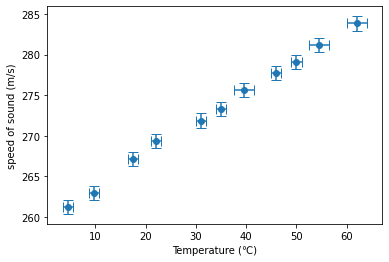

In [21]:
plt.errorbar(T,cs, xerr = uT, yerr=ucs, fmt='o', capsize=5)
print(cs)
plt.xlabel("Temperature (℃)")
plt.ylabel("speed of sound (m/s)")

plt.savefig('Bilder/fg/speedofsound-avg.png',dpi=300)

[1.27240333 1.27688617 1.27590987 1.27910787 1.28656185 1.28311276
 1.28636402 1.30080467 1.29954897 1.29297389 1.30113578]


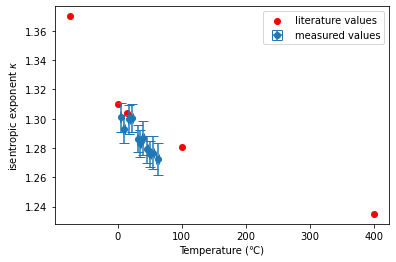

In [22]:
plt.errorbar(T,k, xerr = uT, yerr=uk, fmt='o', capsize=5, label="measured values")
print(k)
plt.scatter(Tl,kl,color="r",label="literature values")

plt.xlabel("Temperature (℃)")
plt.ylabel("isentropic exponent $\kappa$")

plt.legend()


plt.savefig('Bilder/fg/isentropic-exponent-global.png',dpi=300)

[1.27240333 1.27688617 1.27590987 1.27910787 1.28656185 1.28311276
 1.28636402 1.30080467 1.29954897 1.29297389 1.30113578]


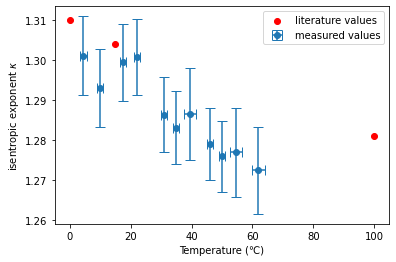

In [23]:
plt.errorbar(T,k, xerr = uT, yerr=uk, fmt='o', capsize=5, label="measured values")
print(k)
plt.scatter(Tl[1:4],kl[1:4],color="r",label="literature values")

plt.xlabel("Temperature (℃)")
plt.ylabel("isentropic exponent $\kappa$")

plt.legend()

plt.savefig('Bilder/fg/isentropic-exponent.png',dpi=300)

[7.34205428 7.22318494 7.24874402 7.16568836 6.97929606 7.06432302
 6.98411753 6.64883294 6.67670463 6.82654684 6.64152235]


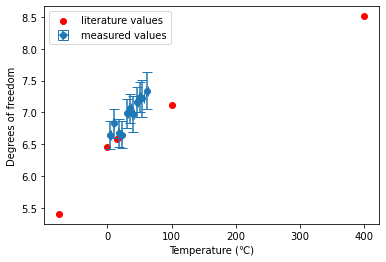

In [24]:
plt.errorbar(T,fg, xerr = uT, yerr=ufg, fmt='o', capsize=5, label="measured values")
print(fg)
plt.scatter(Tl,fgl,color="r",label="literature values")


plt.xlabel("Temperature (℃)")
plt.ylabel("Degrees of freedom")

plt.legend()

plt.savefig('Bilder/fg/degrees-of-freedom-global.png',dpi=300)

[7.34205428 7.22318494 7.24874402 7.16568836 6.97929606 7.06432302
 6.98411753 6.64883294 6.67670463 6.82654684 6.64152235]


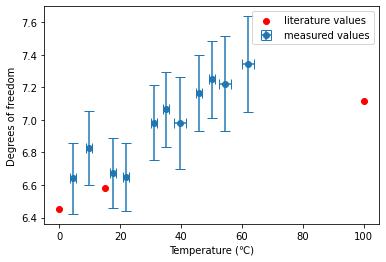

In [25]:
plt.errorbar(T,fg, xerr = uT, yerr=ufg, fmt='o', capsize=5, label="measured values")
print(fg)
plt.scatter(Tl[1:4],fgl[1:4],color="r",label="literature values")


plt.xlabel("Temperature (℃)")
plt.ylabel("Degrees of freedom")

plt.legend()

plt.savefig('Bilder/fg/degrees-of-freedom.png',dpi=300)

[1.27240333 1.27688617 1.27590987 1.27910787 1.28656185 1.28311276
 1.28636402 1.30080467 1.29954897 1.29297389 1.30113578]


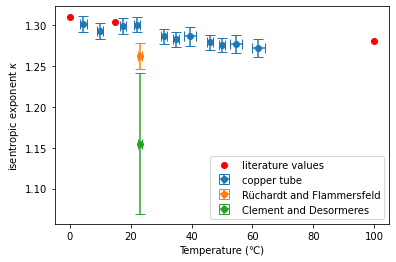

In [36]:
x =23	
ux=0.7

plt.errorbar(T,k, xerr = uT, yerr=uk, fmt='o', capsize=5, label="copper tube")
print(k)
plt.scatter(Tl[1:4],kl[1:4],color="r",label="literature values")

plt.xlabel("Temperature (℃)")
plt.ylabel("isentropic exponent $\kappa$")

plt.errorbar(x,1.262 ,yerr=0.016,xerr=ux,fmt='o', capsize=5,label="Rüchardt and Flammersfeld")
plt.errorbar(x,1.155,yerr=0.086,xerr=ux,fmt='o', capsize=5,label="Clement and Desormeres")

# plt.errorbar([x]*2,[1.172,1.137] ,yerr=[0.116,0.127],xerr=[ux]*2,fmt='o', capsize=5,label="Clement and Desormeres")

plt.legend()
plt.savefig('Bilder/fg/isentropic-exponent-comparison.png',dpi=300)